# Continuous Control

---

Congratulations for completing the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program!  In this notebook, you will learn how to control an agent in a more challenging environment, where the goal is to train a creature with four arms to walk forward.  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Crawler.app"`
- **Windows** (x86): `"path/to/Crawler_Windows_x86/Crawler.exe"`
- **Windows** (x86_64): `"path/to/Crawler_Windows_x86_64/Crawler.exe"`
- **Linux** (x86): `"path/to/Crawler_Linux/Crawler.x86"`
- **Linux** (x86_64): `"path/to/Crawler_Linux/Crawler.x86_64"`
- **Linux** (x86, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86"`
- **Linux** (x86_64, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86_64"`

For instance, if you are using a Mac, then you downloaded `Crawler.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Crawler.app")
```

In [2]:
import glob
path = glob.glob('./Crawler/**/Crawler.exe', recursive=True)[0]

In [3]:
env = UnityEnvironment(file_name=path)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: CrawlerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 129
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 20
        Vector Action descriptions: , , , , , , , , , , , , , , , , , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 12
Size of each action: 20
There are 12 agents. Each observes a state with length: 129
The state for the first agent looks like: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.25000000e+00
  1.00000000e+00  0.00000000e+00  1.78813934e-07  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.06093168e-01 -1.42857209e-01 -6.06078804e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.33339906e+00 -1.42857209e-01
 -1.33341408e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.0609

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 2):
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    i=0
    while True:
        actions = np.random.randn(num_agents, action_size) * 0.7 # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        i += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.3019013622154792


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import torch
from DDPGAgent_Crawler import DDPG
from PPOAgent_Crawler import PPOAgent
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = 'cpu'

In [9]:
%%time
agent = DDPG(env,state_size=state_size, action_size=action_size, seed=0, device=device,
              fc_units_act=(256,256), fc_units_critic=(256, 256, 128), parameter_noise=False, correlated_action_noise = False)
scores, scores_avg = agent.learn(n_episodes=4000, max_t=701)

Episode 4000	Average Score: 46.76Wall time: 1h 18min 25s


In [10]:
%%time
agent = DDPG(env,state_size=state_size, action_size=action_size, seed=0, device=device,
             fc_units_act=(256,256), fc_units_critic=(256, 256, 128), parameter_noise=False, correlated_action_noise = True)
scores2, scores_avg2 = agent.learn(n_episodes=4000, max_t=701)

Episode 4000	Average Score: 42.03Wall time: 1h 48min 54s
Parser   : 102 ms


In [11]:
%%time
agent = DDPG(env,state_size=state_size, action_size=action_size, seed=0, device=device,
              fc_units_act=(256,256), fc_units_critic=(256, 256, 128), parameter_noise=True)
scores3, scores_avg3 = agent.learn(n_episodes=4000, max_t=701)

Episode 4000	Average Score: 26.63Wall time: 1h 33min 34s


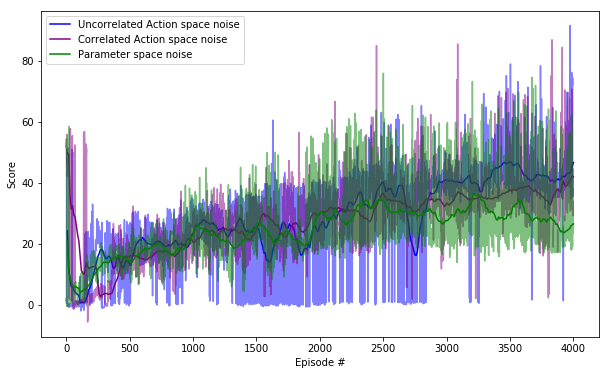

In [12]:
# plot the scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, alpha=0.5, color = 'blue')
plt.plot(np.append(np.arange(1,len(scores_avg))*10 ,len(scores)), scores_avg, color = 'blue',
         label='Uncorrelated Action space noise')
plt.plot(np.arange(len(scores2)), scores2, alpha=0.5, color = 'purple')
plt.plot(np.append(np.arange(1,len(scores_avg2))*10 ,len(scores2)), scores_avg2, color = 'purple',
         label='Correlated Action space noise')
plt.plot(np.arange(len(scores3)), scores3, alpha=0.5, color = 'green')
plt.plot(np.append(np.arange(1,len(scores_avg3))*10 ,len(scores3)), scores_avg3, color = 'green',
         label='Parameter space noise')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

In [9]:
%%time
agent = DDPG(env,state_size=state_size, action_size=action_size, seed=0, device=device,
             fc_units_act=(256,256), fc_units_critic=(512, 512, 256), parameter_noise=False, correlated_action_noise = True)
scores2, scores_avg2 = agent.learn(n_episodes=10000, max_t=701, save=True, target=500.)

Episode 10000	Average Score: 36.92Wall time: 2h 17min 25s


In [64]:
for _ in range(10):
    agent.play()

No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved model file found
No saved mod

In [11]:
%%time
agent2 = PPOAgent(env, state_size=state_size, action_size=action_size, seed=0, 
                  device=device, fc_units_actor=(64, 64), fc_units_critic=(256, 256, 128))
scores5, scores_avg5 = agent2.learn(n_episodes=2000, max_t=1002, use_gae = True)

Episode 2000	Average Score: 1.66Wall time: 1h 10min 11s


In [ ]:
# plot the scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores4)), scores4, alpha=0.5, color = 'gold')
plt.plot(np.append(np.arange(1,len(scores_avg4))*10 ,len(scores4)), scores_avg4, color = 'gold', label='PPO without GAE')
#plt.plot(np.arange(len(scores5)), scores5, alpha=0.5, color = 'orange')
#plt.plot(np.append(np.arange(1,len(scores_avg5))*10 ,len(scores5)), scores_avg5, color = 'orange', label='PPO with GAE')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

When finished, you can close the environment.

In [15]:
env.close()